In [1]:
## Notebook env: mave (mave kernel)
## this notebook allocates randomly selected batches 1,2,3, and 4-6 as four separate datasets to be used for training

In [2]:
import os
os.chdir('/home/ssobti/projects/mir_tud/packages/ciberatac-main/src/mave')
import pandas as pd
import numpy as np
import scanpy as sc
import itertools
import pickle
import shelve

In [3]:
cell_cutoff = 10

In [4]:
sc.settings.verbosity = 3        # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

2024-03-26 15:14:47.447186: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.23.5 scipy==1.10.0 pandas==1.5.2 scikit-learn==1.2.0 statsmodels==0.13.5 pynndescent==0.5.8


In [5]:
adata = sc.read('/home/ssobti/projects/mir_tud/010523_filtered_data/tRF.concat.raw.adata_gex.guide_assigned.h5ad')

Only considering the two last: ['.guide_assigned', '.h5ad'].
Only considering the two last: ['.guide_assigned', '.h5ad'].


In [6]:
adata.obs

,sample,barcode,guide,lor,pvalue,adj_pvalue,max_umi,n_umi,m_umi,v_umi,log_max_umi,log_n_umi,log_m_umi
tRF_1:AAACCCAAGGCCTTGC-1,tRF_1,AAACCCAAGGCCTTGC,TuD_NC_01,2.144148,1.652448e-15,8.377661e-09,23.0,33.0,0.150685,2.458841,1.361728,1.518514,-0.821930
tRF_1:AAACCCACATATACCG-1,tRF_1,AAACCCACATATACCG,tRF_Arg_ACG_2,7.473168,2.865581e-322,1.452806e-315,182.0,214.0,0.977169,151.260944,2.260071,2.330414,-0.010030
tRF_1:AAACCCACATGACAGG-1,tRF_1,AAACCCACATGACAGG,TuD_NC_01,2.336330,3.615579e-22,1.833044e-15,36.0,53.0,0.242009,5.973273,1.556303,1.724276,-0.616168
tRF_1:AAACCCACATGACGGA-1,tRF_1,AAACCCACATGACGGA,tRF_Arg_ACG_2,1.160519,2.865581e-322,1.452806e-315,214.0,372.0,1.698630,237.780319,2.330414,2.570543,0.230099
tRF_1:AAACCCAGTCAACCAT-1,tRF_1,AAACCCAGTCAACCAT,TuD_NC_01,3.011825,9.624496e-26,4.879475e-19,38.0,51.0,0.232877,6.638180,1.579784,1.707570,-0.632874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
tRF_3:TTTGTTGTCAACCGAT-1,tRF_3,TTTGTTGTCAACCGAT,tRNA-Asn-GTT-8-1.rh,5.613436,2.188911e-183,8.570205e-177,67.0,80.0,0.365297,20.535671,1.826075,1.903090,-0.437354
tRF_3:TTTGTTGTCAACTCTT-1,tRF_3,TTTGTTGTCAACTCTT,tRF_Ala_TGC_2,6.433667,4.792437e-322,1.876374e-315,12.0,12.0,0.054795,0.657534,1.079181,1.079181,-1.261263
tRF_3:TTTGTTGTCAAGTGTC-1,tRF_3,TTTGTTGTCAAGTGTC,tRF_Glu_TTC_4,6.069281,6.045232e-186,2.366879e-179,98.0,109.0,0.497717,43.865820,1.991226,2.037426,-0.303018
tRF_3:TTTGTTGTCTCGGTCT-1,tRF_3,TTTGTTGTCTCGGTCT,tRNA-Arg-CCT-4-1.rh,3.380114,3.045139e-52,1.192258e-45,26.0,46.0,0.210046,3.616229,1.414973,1.662758,-0.677686


In [7]:
adata2 = sc.read('/home/ssobti/projects/mir_tud/101423_filtered_data/tRF.integrated.qc_norm_scaled.dimred.clustered.gex.guide_assigned.h5ad')

Only considering the two last: ['.guide_assigned', '.h5ad'].
Only considering the two last: ['.guide_assigned', '.h5ad'].


/home/ssobti/miniconda3/envs/mave/lib/python3.10/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(


In [8]:
adata2.obs

,orig.ident,nCount_RNA,nFeature_RNA,sample,barcode,guide,lor,pvalue,adj_pvalue,max_umi,n_umi,m_umi,v_umi,log_max_umi,log_n_umi,log_m_umi,percent.mt,integrated_snn_res.0.5,seurat_clusters,guide_group
tRF_1:AAACCCAAGGCCTTGC-1,tRF,20239.0,5372,tRF_1,AAACCCAAGGCCTTGC,TuD_NC_01,2.144148,1.652448e-15,8.377661e-09,23.0,33.0,0.150685,2.458841,1.361728,1.518514,-0.821930,6.363951,4,control,control
tRF_1:AAACCCACATATACCG-1,tRF,35201.0,7086,tRF_1,AAACCCACATATACCG,tRF_Arg_ACG_2,7.473168,2.865581e-322,1.452806e-315,182.0,214.0,0.977169,151.260944,2.260071,2.330414,-0.010030,6.295276,3,T3,target
tRF_1:AAACCCACATGACAGG-1,tRF,32207.0,6695,tRF_1,AAACCCACATGACAGG,TuD_NC_01,2.336330,3.615579e-22,1.833044e-15,36.0,53.0,0.242009,5.973273,1.556303,1.724276,-0.616168,6.237774,1,control,control
tRF_1:AAACCCACATGACGGA-1,tRF,38017.0,7151,tRF_1,AAACCCACATGACGGA,tRF_Arg_ACG_2,1.160519,2.865581e-322,1.452806e-315,214.0,372.0,1.698630,237.780319,2.330414,2.570543,0.230099,6.831154,3,T3,target
tRF_1:AAACCCAGTCAACCAT-1,tRF,28633.0,6505,tRF_1,AAACCCAGTCAACCAT,TuD_NC_01,3.011825,9.624496e-26,4.879475e-19,38.0,51.0,0.232877,6.638180,1.579784,1.707570,-0.632874,8.619425,4,control,control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tRF_3:TTTGTTGGTAGCTTGT-1,tRF,13951.0,4603,tRF_3,TTTGTTGGTAGCTTGT,TuD_NC_01,1.590099,6.739119e-11,2.638555e-04,14.0,19.0,0.086758,0.914457,1.146128,1.278754,-1.061691,10.020787,0,control,control
tRF_3:TTTGTTGGTCACGCTG-1,tRF,53587.0,8540,tRF_3,TTTGTTGGTCACGCTG,tRF_Gly_TCC_4,4.035205,8.878960e-54,3.476363e-47,32.0,35.0,0.159817,4.685350,1.505150,1.544068,-0.796376,10.987740,4,T4,target
tRF_3:TTTGTTGTCAACCGAT-1,tRF,46552.0,8269,tRF_3,TTTGTTGTCAACCGAT,tRNA-Asn-GTT-8-1.rh,5.613436,2.188911e-183,8.570205e-177,67.0,80.0,0.365297,20.535671,1.826075,1.903090,-0.437354,7.767658,0,T0,target
tRF_3:TTTGTTGTCAAGTGTC-1,tRF,16637.0,4784,tRF_3,TTTGTTGTCAAGTGTC,tRF_Glu_TTC_4,6.069281,6.045232e-186,2.366879e-179,98.0,109.0,0.497717,43.865820,1.991226,2.037426,-0.303018,8.721524,2,T2,target


In [9]:
## make sure to only keep that were present in Larisa's normalized data
cells_to_keep = [cell for cell in adata2.obs.index.to_list() if cell in adata.obs.index.to_list()]
adata = adata[cells_to_keep,:]
adata.obs['guide'] = adata2[cells_to_keep,:].obs['guide']

/tmp/ipykernel_3098159/1385362592.py:4: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['guide'] = adata2[cells_to_keep,:].obs['guide']


In [10]:
list(adata.obs.index) == list(adata2.obs.index)

True

In [11]:
adata.obs.loc[:,'guide'] = adata2.obs.loc[:,'miR.family']  ## needs to be changed for tRFs

KeyError: 'miR.family'

In [12]:
adata.obs

,sample,barcode,guide,lor,pvalue,adj_pvalue,max_umi,n_umi,m_umi,v_umi,log_max_umi,log_n_umi,log_m_umi
tRF_1:AAACCCAAGGCCTTGC-1,tRF_1,AAACCCAAGGCCTTGC,TuD_NC_01,2.144148,1.652448e-15,8.377661e-09,23.0,33.0,0.150685,2.458841,1.361728,1.518514,-0.821930
tRF_1:AAACCCACATATACCG-1,tRF_1,AAACCCACATATACCG,tRF_Arg_ACG_2,7.473168,2.865581e-322,1.452806e-315,182.0,214.0,0.977169,151.260944,2.260071,2.330414,-0.010030
tRF_1:AAACCCACATGACAGG-1,tRF_1,AAACCCACATGACAGG,TuD_NC_01,2.336330,3.615579e-22,1.833044e-15,36.0,53.0,0.242009,5.973273,1.556303,1.724276,-0.616168
tRF_1:AAACCCACATGACGGA-1,tRF_1,AAACCCACATGACGGA,tRF_Arg_ACG_2,1.160519,2.865581e-322,1.452806e-315,214.0,372.0,1.698630,237.780319,2.330414,2.570543,0.230099
tRF_1:AAACCCAGTCAACCAT-1,tRF_1,AAACCCAGTCAACCAT,TuD_NC_01,3.011825,9.624496e-26,4.879475e-19,38.0,51.0,0.232877,6.638180,1.579784,1.707570,-0.632874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
tRF_3:TTTGTTGGTAGCTTGT-1,tRF_3,TTTGTTGGTAGCTTGT,TuD_NC_01,1.590099,6.739119e-11,2.638555e-04,14.0,19.0,0.086758,0.914457,1.146128,1.278754,-1.061691
tRF_3:TTTGTTGGTCACGCTG-1,tRF_3,TTTGTTGGTCACGCTG,tRF_Gly_TCC_4,4.035205,8.878960e-54,3.476363e-47,32.0,35.0,0.159817,4.685350,1.505150,1.544068,-0.796376
tRF_3:TTTGTTGTCAACCGAT-1,tRF_3,TTTGTTGTCAACCGAT,tRNA-Asn-GTT-8-1.rh,5.613436,2.188911e-183,8.570205e-177,67.0,80.0,0.365297,20.535671,1.826075,1.903090,-0.437354
tRF_3:TTTGTTGTCAAGTGTC-1,tRF_3,TTTGTTGTCAAGTGTC,tRF_Glu_TTC_4,6.069281,6.045232e-186,2.366879e-179,98.0,109.0,0.497717,43.865820,1.991226,2.037426,-0.303018


In [13]:
del adata2

In [14]:
### feed in raw matrix (adata.X) into VAE with filter out cells with low # genes and genes expressed in low # of cells
adata.var_names_make_unique()

In [15]:
adata.shape

(23540, 36601)

normalizing counts per cell
    finished (0:00:01)


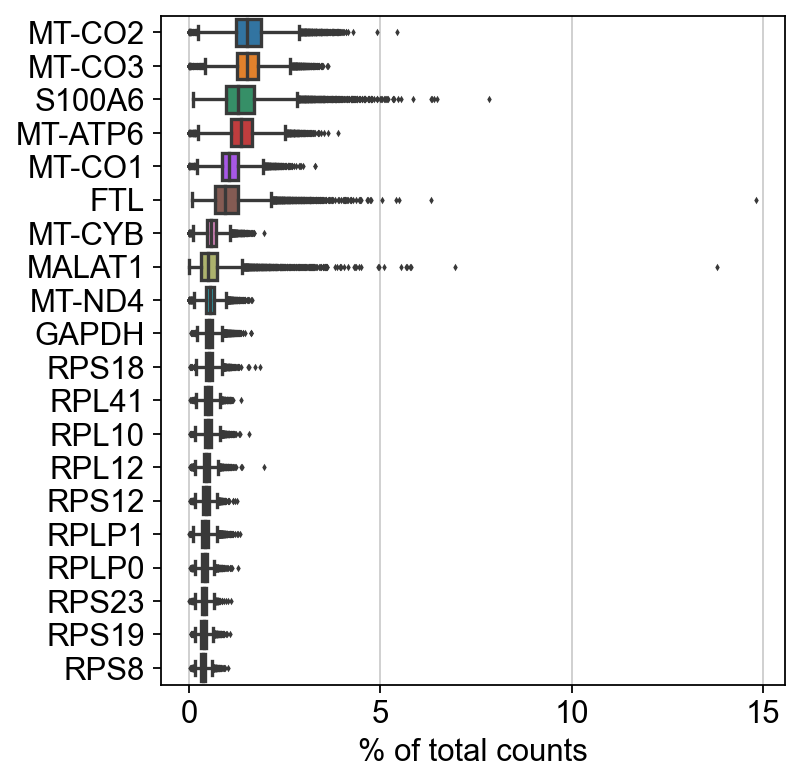

In [16]:
sc.pl.highest_expr_genes(adata, n_top=20)

In [17]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 7143 genes that are detected in less than 3 cells


In [18]:
adata.shape

(23540, 29458)

In [19]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

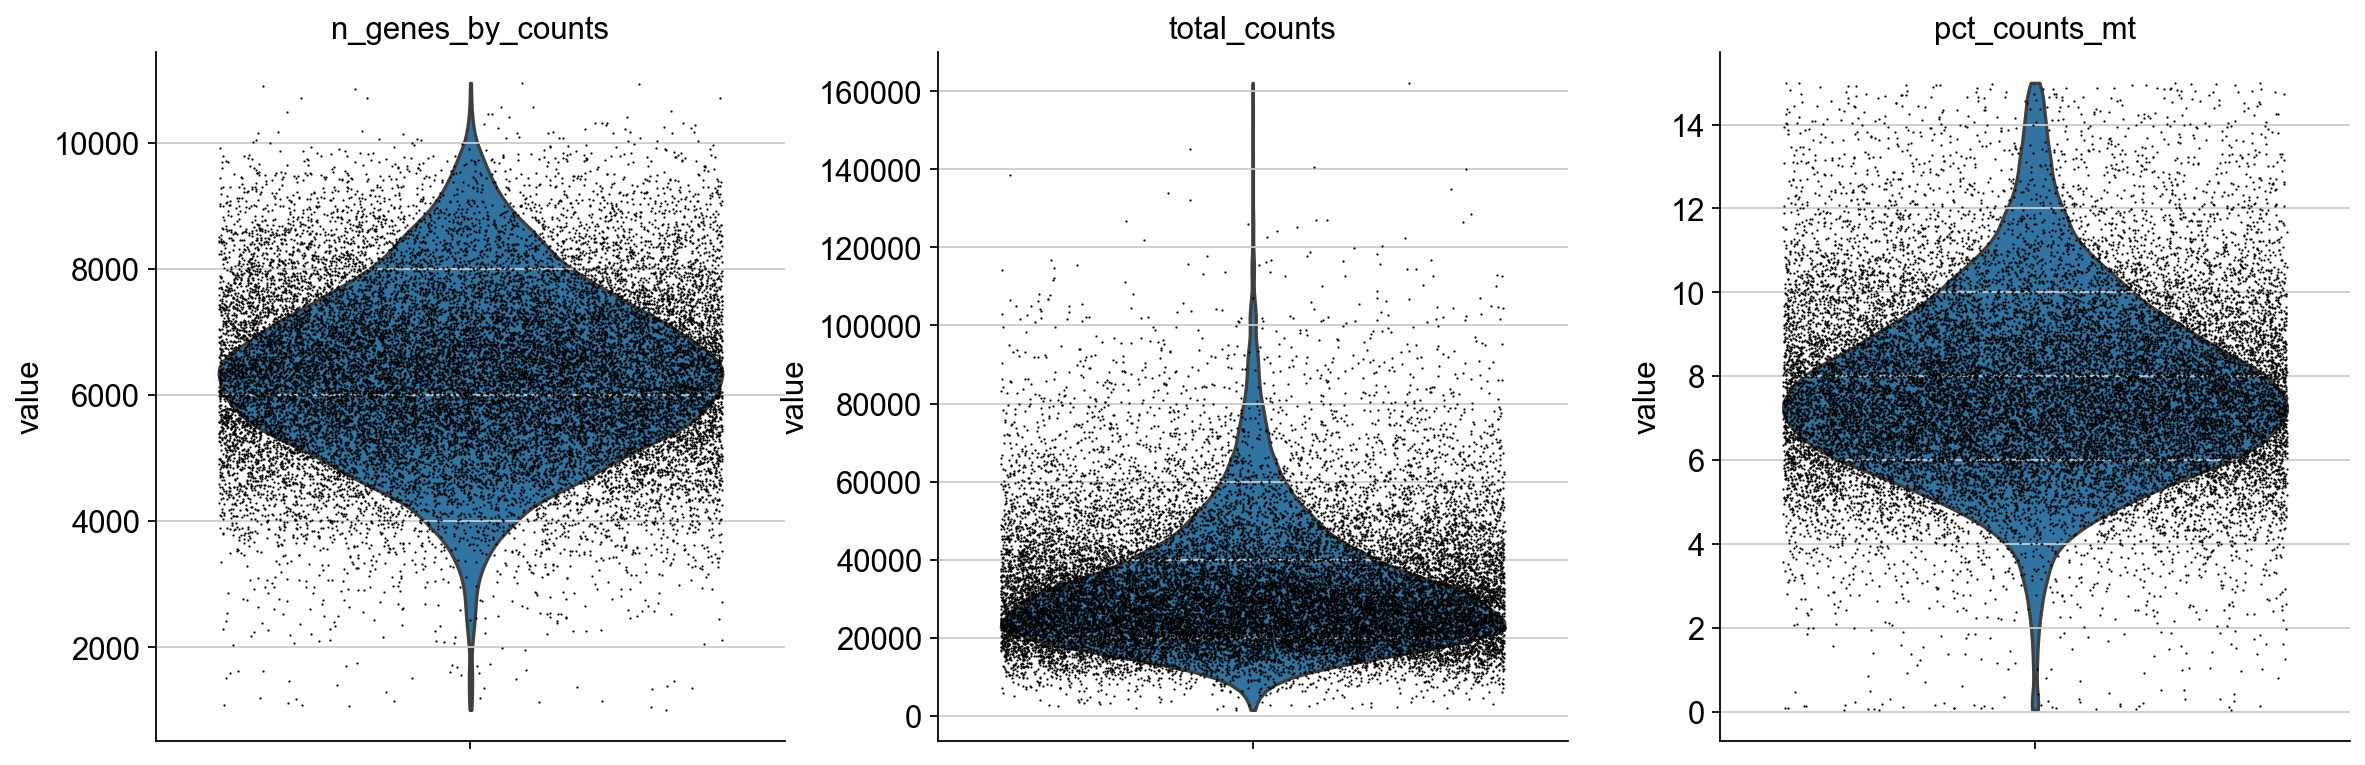

In [20]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

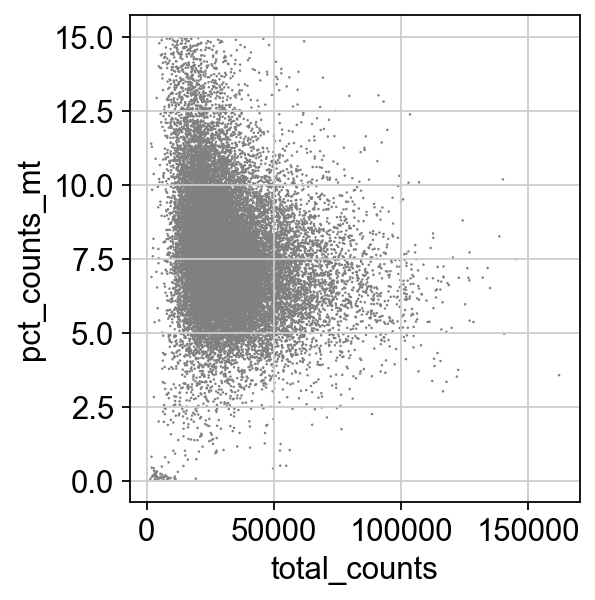

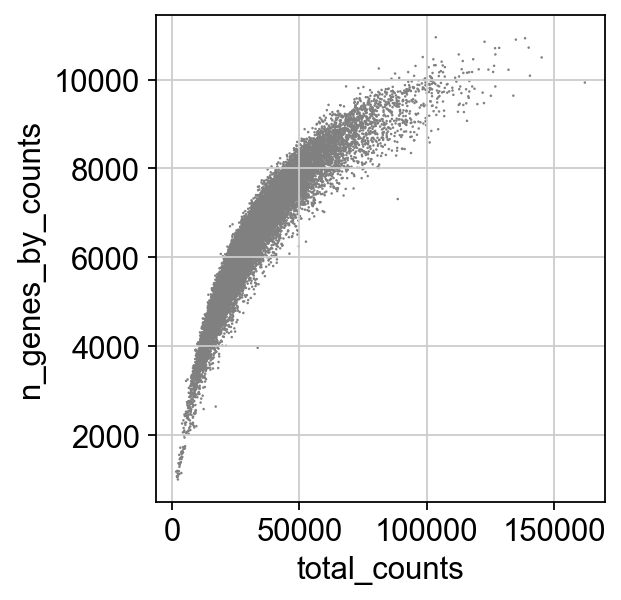

In [21]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt',)
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [22]:
adata = adata[adata.obs.pct_counts_mt < 15, :]

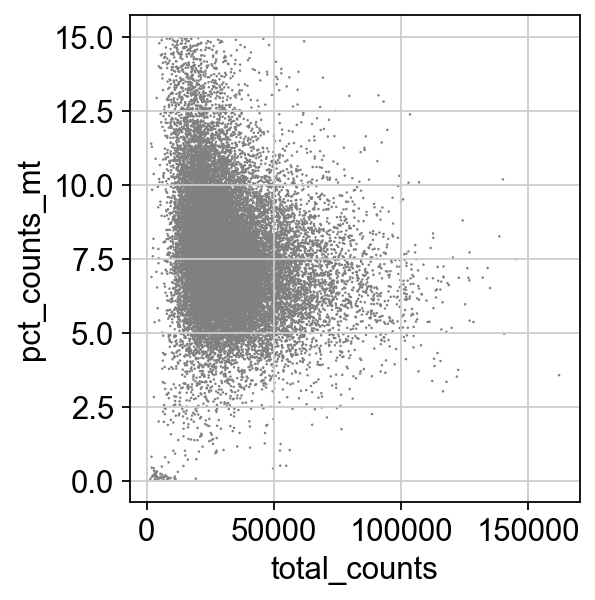

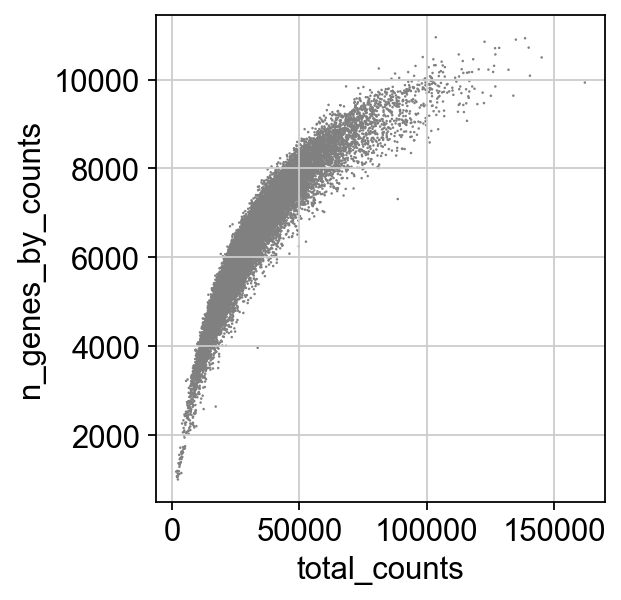

In [23]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt',)
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [24]:
adata.shape

(23540, 29458)

In [25]:
### remove control cells from adata
cells_to_keep = [cell for cell, cell_type in zip(adata.obs.index, adata.obs['guide']) if not cell_type.startswith('TuD_NC')]
adata = adata[cells_to_keep,:]

82.56410256410257% of cells remain after guides with < 10 cells are removed


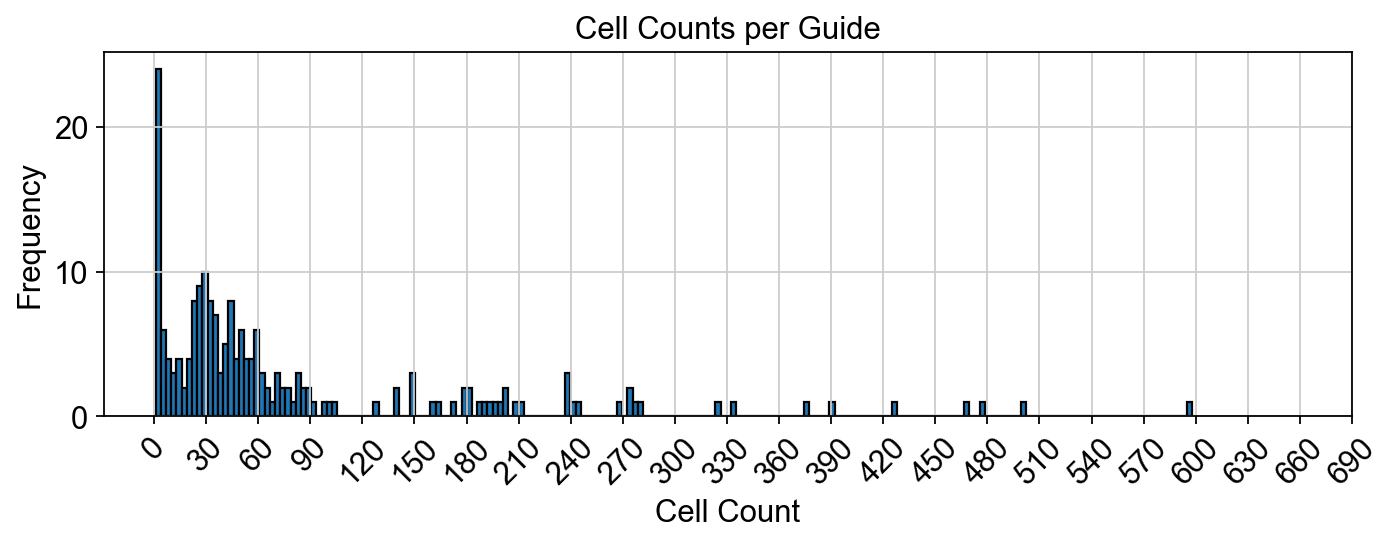

In [26]:
## get cell counts per guide
from collections import Counter
cell_counts = list(Counter(adata.obs['guide']).values())

## count % of guides >= cell_cutoff
print(f'{100*sum([1 for val in cell_counts if val >= cell_cutoff])/len(cell_counts)}% of cells remain after guides with < {cell_cutoff} cells are removed')

import matplotlib.pyplot as plt

# Create histogram
plt.hist(cell_counts, bins=200, edgecolor='black')

# Add labels and title
plt.xlabel('Cell Count')
plt.ylabel('Frequency')
plt.title('Cell Counts per Guide')

plt.xticks(np.arange(0, 700, 30), rotation=45)

## increase width of the plot
plt.gcf().set_size_inches(10, 3)
# Display the histogram
plt.show()


In [27]:
## remove guides with cell counts < cell_cutoff
guide_counts = adata.obs['guide'].value_counts()
kept_guides = guide_counts[guide_counts >= cell_cutoff]
adata = adata[adata.obs['guide'].isin(kept_guides.index.tolist()),:]

In [28]:
adata.shape

(15680, 29458)

In [29]:
adata.obs

,sample,barcode,guide,lor,pvalue,adj_pvalue,max_umi,n_umi,m_umi,v_umi,log_max_umi,log_n_umi,log_m_umi,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
tRF_1:AAACCCACATATACCG-1,tRF_1,AAACCCACATATACCG,tRF_Arg_ACG_2,7.473168,2.865581e-322,1.452806e-315,182.0,214.0,0.977169,151.260944,2.260071,2.330414,-0.010030,7088,7087,35202.0,2216.0,6.295097
tRF_1:AAACCCACATGACGGA-1,tRF_1,AAACCCACATGACGGA,tRF_Arg_ACG_2,1.160519,2.865581e-322,1.452806e-315,214.0,372.0,1.698630,237.780319,2.330414,2.570543,0.230099,7152,7152,38018.0,2597.0,6.830975
tRF_1:AAACCCAGTTATCTTC-1,tRF_1,AAACCCAGTTATCTTC,tRF_Glu_CTC_2,4.656560,7.086097e-135,3.592545e-128,69.0,88.0,0.401826,21.984584,1.838849,1.944483,-0.395961,6690,6690,28003.0,1853.0,6.617148
tRF_1:AAACCCATCGTGGGAA-1,tRF_1,AAACCCATCGTGGGAA,tRF_Lys_TTT_2,2.024558,2.865581e-322,1.452806e-315,272.0,379.0,1.730594,362.326170,2.434569,2.578639,0.238195,6135,6135,28249.0,1149.0,4.067400
tRF_1:AAACGAAAGTCTCTGA-1,tRF_1,AAACGAAAGTCTCTGA,tRF_Ala_TGC.AGC_6,2.227511,6.138288e-15,3.112020e-08,8.0,9.0,0.041096,0.296469,0.903090,0.954243,-1.386202,4025,4025,12857.0,715.0,5.561173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tRF_3:TTTGTTGCAATTAGGA-1,tRF_3,TTTGTTGCAATTAGGA,tRF_Cys.Ala_GCA.AGC_3,1.503047,3.938314e-160,1.541961e-153,105.0,247.0,1.127854,83.974404,2.021189,2.392697,0.052253,5940,5940,26850.0,1681.0,6.260708
tRF_3:TTTGTTGCACTCTGCT-1,tRF_3,TTTGTTGCACTCTGCT,tRF_Gln_CTG_2,2.443993,6.692845e-167,2.620437e-160,101.0,159.0,0.726027,51.713586,2.004321,2.201397,-0.139047,5075,5075,17245.0,1451.0,8.414033
tRF_3:TTTGTTGGTCACGCTG-1,tRF_3,TTTGTTGGTCACGCTG,tRF_Gly_TCC_4,4.035205,8.878960e-54,3.476363e-47,32.0,35.0,0.159817,4.685350,1.505150,1.544068,-0.796376,8543,8543,53590.0,5888.0,10.987124
tRF_3:TTTGTTGTCAACCGAT-1,tRF_3,TTTGTTGTCAACCGAT,tRNA-Asn-GTT-8-1.rh,5.613436,2.188911e-183,8.570205e-177,67.0,80.0,0.365297,20.535671,1.826075,1.903090,-0.437354,8271,8271,46554.0,3616.0,7.767324


In [30]:
### pertubation annotation to add to each cell
one_hot_df = pd.get_dummies(adata.obs["guide"])

In [31]:
one_hot_df

,tRF_Ala_AGC_2,tRF_Ala_CGC.AGC.TGC_5,tRF_Ala_CGC_2,tRF_Ala_TGC.AGC_6,tRF_Ala_TGC_2,tRF_Arg_ACG_2,tRF_Arg_CCG.CCT_3,tRF_Arg_CCT_2,tRF_Arg_CCT_3,tRF_Arg_TCG.CCG_2,...,tRNA-Tyr-GTA-2-1.lh,tRNA-Val-AAC-3-1.2t,tRNA-Val-AAC-3-1.rh,tRNA-Val-CAC-2-1.rh,tRNA-Val-CAC-3-1.rh,tRNA-Val-CAC-6-1.rh,tRNA-Val-CAC-(6)1-1.rh,tRNA-Val-TAC-(2)1-1.2t,tRNA-iMet-CAT-(8)1-1.2t,tRNA-iMet-CAT-(8)1-1.rh
tRF_1:AAACCCACATATACCG-1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tRF_1:AAACCCACATGACGGA-1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tRF_1:AAACCCAGTTATCTTC-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tRF_1:AAACCCATCGTGGGAA-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tRF_1:AAACGAAAGTCTCTGA-1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tRF_3:TTTGTTGCAATTAGGA-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tRF_3:TTTGTTGCACTCTGCT-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tRF_3:TTTGTTGGTCACGCTG-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tRF_3:TTTGTTGTCAACCGAT-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
## add the gene annotation for the first layer
## the first layer is connected to the second in a way such that reflects pathways
## RBP_gene_df is the gene connections (first layer) to TFs (second layer) gmt file

In [33]:
import scipy.sparse as sp_sparse
import tables
from itertools import chain
from model import loss_function
from model import VAE
import numpy as np
import os
import pandas as pd
import torch
from gseapy import read_gmt
from datetime import datetime


In [34]:
gene_set_annot = pd.read_csv('/home/ssobti/projects/mir_tud/uploaded_data/tRF_mave_genesets/kegg_gene_sets.csv', sep=',')

In [35]:
gene_set_annot = gene_set_annot.loc[:, ['gs_name', 'gene_symbol']]
gene_set_annot

,gs_name,gene_symbol
0,KEGG_ABC_TRANSPORTERS,ABCA1
1,KEGG_ABC_TRANSPORTERS,ABCA10
2,KEGG_ABC_TRANSPORTERS,ABCA12
3,KEGG_ABC_TRANSPORTERS,ABCA13
4,KEGG_ABC_TRANSPORTERS,ABCA2
...,...,...
16278,KEGG_WNT_SIGNALING_PATHWAY,WNT8A
16279,KEGG_WNT_SIGNALING_PATHWAY,WNT8B
16280,KEGG_WNT_SIGNALING_PATHWAY,WNT9A
16281,KEGG_WNT_SIGNALING_PATHWAY,WNT9B


In [36]:
gene_sets = list(set(gene_set_annot.loc[:,'gs_name']))

In [37]:
gmt_file = {}
for idx, gene_set in enumerate(gene_sets):
    targets = gene_set_annot.loc[gene_set == gene_set_annot.loc[:, 'gs_name'], 'gene_symbol']
    gmt_file[gene_set] = list(targets)

In [38]:
### creating a matrix that links gene sets (columns) to master regulators (rows) via 0/1 annotation
gmt_file = pd.Series(gmt_file).str.join('|')
gmt_file = gmt_file.str.get_dummies()
gmt_file

,A2M,A4GALT,AACS,AADAT,AANAT,AARS1,AARS2,AASDH,AASDHPPT,AASS,...,ZBTB16,ZBTB17,ZCCHC7,ZFYVE16,ZFYVE9,ZIC2,ZMAT2,ZMAT3,ZNF274,ZYX
KEGG_METABOLISM_OF_XENOBIOTICS_BY_CYTOCHROME_P450,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
KEGG_ACUTE_MYELOID_LEUKEMIA,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
KEGG_APOPTOSIS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
KEGG_COLORECTAL_CANCER,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
KEGG_ENDOCYTOSIS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KEGG_FOCAL_ADHESION,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
KEGG_WNT_SIGNALING_PATHWAY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
KEGG_TGF_BETA_SIGNALING_PATHWAY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
KEGG_CALCIUM_SIGNALING_PATHWAY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
## remove genes not in intersection bw expression matrix and gene_set annotation df
a = set(gmt_file.columns.to_list())
b = set(adata.var.index.to_list())

intersecting_genes = list(a.intersection(b))
print('Genes in annotated gene sets', len(a))
print('Genes in expression matrix', len(b))
print('Union', len(a.union(b)))
print('Intersecting genes kept', len(a.intersection(b)))

adata = adata[:, intersecting_genes]
gmt_file = gmt_file.loc[:, intersecting_genes]

Genes in annotated gene sets 5245
Genes in expression matrix 29458
Union 30162
Intersecting genes kept 4541


In [40]:
gmtmat_df = gmt_file.transpose()
gmtmat_df

,KEGG_METABOLISM_OF_XENOBIOTICS_BY_CYTOCHROME_P450,KEGG_ACUTE_MYELOID_LEUKEMIA,KEGG_APOPTOSIS,KEGG_COLORECTAL_CANCER,KEGG_ENDOCYTOSIS,KEGG_PORPHYRIN_AND_CHLOROPHYLL_METABOLISM,KEGG_GLYCOSAMINOGLYCAN_BIOSYNTHESIS_CHONDROITIN_SULFATE,KEGG_AXON_GUIDANCE,KEGG_CARDIAC_MUSCLE_CONTRACTION,KEGG_RETINOL_METABOLISM,...,KEGG_ERBB_SIGNALING_PATHWAY,KEGG_NITROGEN_METABOLISM,KEGG_BASAL_TRANSCRIPTION_FACTORS,KEGG_LEUKOCYTE_TRANSENDOTHELIAL_MIGRATION,KEGG_LEISHMANIA_INFECTION,KEGG_FOCAL_ADHESION,KEGG_WNT_SIGNALING_PATHWAY,KEGG_TGF_BETA_SIGNALING_PATHWAY,KEGG_CALCIUM_SIGNALING_PATHWAY,KEGG_MAPK_SIGNALING_PATHWAY
POLR3C,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ITGB7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
XRCC1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NFASC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PRNP,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LGMN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SLC25A17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MAN2A1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CCR3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
gmtmat = gmtmat_df.to_numpy()
gmtmat

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [42]:
device='cpu'

In [43]:
gmttensor = torch.from_numpy(
            np.transpose(gmtmat)).to(device).long()
gmttensor

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])

In [44]:
## this function tells you how many paramters are in a model
def get_n_params(model):
    pp = 0
    for p in list(model.parameters()):
        nn = 1
        for s in list(p.size()):
            nn = nn * s
        pp += nn
    return pp

# Twin Model

In [45]:
import random
samps=random.sample(list(adata.obs.guide.unique()),2)
samps

['tRNA-Arg-CCG-(3)1-1.rh', 'tRNA-Arg-TCG-1-1.lh']

In [46]:
adata.obs.index

Index(['tRF_1:AAACCCACATATACCG-1', 'tRF_1:AAACCCACATGACGGA-1',
       'tRF_1:AAACCCAGTTATCTTC-1', 'tRF_1:AAACCCATCGTGGGAA-1',
       'tRF_1:AAACGAAAGTCTCTGA-1', 'tRF_1:AAACGAAGTAGGACTG-1',
       'tRF_1:AAACGAAGTATGATCC-1', 'tRF_1:AAACGCTCAAGCACAG-1',
       'tRF_1:AAACGCTCACACGCCA-1', 'tRF_1:AAACGCTCAGCTTCCT-1',
       ...
       'tRF_3:TTTGGAGGTCGATTAC-1', 'tRF_3:TTTGGAGGTGGTCTAT-1',
       'tRF_3:TTTGGAGTCTTCGCTG-1', 'tRF_3:TTTGGTTTCCCTCGTA-1',
       'tRF_3:TTTGTTGAGTGCCGAA-1', 'tRF_3:TTTGTTGCAATTAGGA-1',
       'tRF_3:TTTGTTGCACTCTGCT-1', 'tRF_3:TTTGTTGGTCACGCTG-1',
       'tRF_3:TTTGTTGTCAACCGAT-1', 'tRF_3:TTTGTTGTCAAGTGTC-1'],
      dtype='object', length=15680)

In [47]:
ct_cbc_dict = {}
cbc_ct_dict = {}
for ct in list(adata.obs.guide.unique()):
    ct_cbc_dict[ct] = adata.obs.query(f'guide==\"{ct}\"').index.tolist()
    for cbc in ct_cbc_dict[ct]:
        cbc_ct_dict[cbc] = ct
list(ct_cbc_dict.items())[1]

('tRF_Glu_CTC_2',
 ['tRF_1:AAACCCAGTTATCTTC-1',
  'tRF_1:AACCAACAGGTAAAGG-1',
  'tRF_1:ACTTTCACAACGGTAG-1',
  'tRF_1:ACTTTGTTCCTACACC-1',
  'tRF_1:AGCTCAAAGTGGATTA-1',
  'tRF_1:AGCTTCCGTCGTTGCG-1',
  'tRF_1:AGGTTGTCAAGAGTTA-1',
  'tRF_1:AGTGCCGGTCAGCGTC-1',
  'tRF_1:ATGGAGGCACAGCTGC-1',
  'tRF_1:ATTACTCAGACCCGCT-1',
  'tRF_1:ATTATCCGTGCTGCAC-1',
  'tRF_1:ATTTACCAGTTAACAG-1',
  'tRF_1:CACACAACAAATGAGT-1',
  'tRF_1:CACCAAAGTCTCGGGT-1',
  'tRF_1:CACGTGGGTAAGATCA-1',
  'tRF_1:CACTAAGGTAGCGAGT-1',
  'tRF_1:CATCGTCGTACACGCC-1',
  'tRF_1:CCACGTTAGTTCCGGC-1',
  'tRF_1:CCCGAAGGTTGGATCT-1',
  'tRF_1:CCGGTGAGTACCCGAC-1',
  'tRF_1:CGACAGCGTTAAGCAA-1',
  'tRF_1:CGTAAGTGTGGAGGTT-1',
  'tRF_1:CTACCTGGTGATATAG-1',
  'tRF_1:CTAGGTATCTAACACG-1',
  'tRF_1:CTGAATGTCTGAATGC-1',
  'tRF_1:CTGAGCGGTCCATACA-1',
  'tRF_1:GAATCGTCAATGTCAC-1',
  'tRF_1:GACCTTCGTGAGTTGG-1',
  'tRF_1:GACGCTGCACGCTATA-1',
  'tRF_1:GACTCAACAGGTGGAT-1',
  'tRF_1:GATAGAATCGCAGATT-1',
  'tRF_1:GATGTTGAGCCTCATA-1',
  'tRF_1:GATTTCTAGGTCG

In [48]:
list(cbc_ct_dict.items())[1]

('tRF_1:AAACCCACATGACGGA-1', 'tRF_Arg_ACG_2')

In [49]:
adata.X.toarray().shape

(15680, 4541)

In [50]:
adata.var.shape

(4541, 7)

In [51]:
## this converts the expression matrix to a dictionary 
## where each cell/row of matrix is now a 'key' with associated gene expression values

cbc_arr_dict = {}
for cbc, arr in zip(adata.obs.index.tolist(), adata.X.toarray()):
    cbc_arr_dict[cbc] = arr.copy()
list(cbc_arr_dict.items())[1]

('tRF_1:AAACCCACATGACGGA-1',
 array([ 1.,  0.,  1., ...,  1.,  0., 13.], dtype=float32))

In [52]:
## this converts the cell barcode to guide annotation df to a dictionary 
one_hot_dict = one_hot_df.T.to_dict(orient='list')
list(one_hot_dict.keys())[0]

'tRF_1:AAACCCACATATACCG-1'

In [53]:
numlvs = 10
vae = VAE(adata.shape[1],  # num genes
              gmttensor, #gmttensor
              len(set(adata.obs["guide"])), #number of cell types
              0,  # batch
              0,  # labels
              gmtmat.shape[1],  # hiddensize
              numlvs)

n_params = get_n_params(vae)
print("VAE has {} parameters".format(n_params))
vae.to(device)

VAE has 4250713 parameters


VAE(
  (z_encoder): Encoder(
    (encoder): FCLayersEncoder(
      (fc_layers): Sequential(
        (Layer_0): Sequential(
          (0): CustomConnected()
          (1): BatchNorm1d(186, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): None
          (3): ReLU()
          (4): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (mean_encoder): Linear(in_features=186, out_features=10, bias=True)
    (var_encoder): Linear(in_features=186, out_features=10, bias=True)
  )
  (ctpred_linear): Linear(in_features=10, out_features=161, bias=True)
  (ctpred_activation): ReLU()
  (l_encoder): Encoder(
    (encoder): FCLayersEncoder(
      (fc_layers): Sequential(
        (Layer_0): Sequential(
          (0): CustomConnected()
          (1): BatchNorm1d(186, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): None
          (3): ReLU()
          (4): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (mean_encoder): Linear(in

In [54]:
optimizer = torch.optim.Adam(
        vae.parameters(), lr=0.002)

SAMPLE_IDXS = adata.shape[0]

In [55]:
import numpy as np
import random

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
import torchvision
from torchvision import transforms

class tripletDataset(Dataset):
    def __init__(self, cbc_list, ct_list, ct_cbc_dict, cbc_ct_dict, cbc_arr_dict, one_hot_dict):
        self.cbc_list = cbc_list
        self.ct_list = ct_list
        self.ct_cbc_dict = ct_cbc_dict
        self.cbc_ct_dict = cbc_ct_dict
        self.cbc_arr_dict = cbc_arr_dict
        self.one_hot_dict = one_hot_dict
    
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        
        cbc_anchor = self.cbc_list[idx]
        ct_anchor = self.cbc_ct_dict[cbc_anchor]

        #for negative, pick two random cell types, in case the 1st one turned out to be the same as the anchor's cell type
        ct1, ct2 = random.sample(self.ct_list, 2) 
        ct_neg = ct1
        if ct1==ct_anchor:
            ct_neg = ct2
        
        #for positive, pick two cell barcodes, in case the 1st one turned out to be the anchor itself
        cbc1, cbc2 = random.sample(self.ct_cbc_dict[ct_anchor], 2)
        cbc_pos = cbc1
        if cbc1==cbc_anchor:
            cbc_pos = cbc2
        
        cbc_neg = random.choice(self.ct_cbc_dict[ct_neg])
        
        ohot_arr = np.array(self.one_hot_dict[cbc_anchor])
                
        return (torch.from_numpy(cbc_arr_dict[cbc_anchor].astype(np.float32)),
                torch.from_numpy(cbc_arr_dict[cbc_pos].astype(np.float32)),
                torch.from_numpy(cbc_arr_dict[cbc_neg].astype(np.float32)),
                torch.from_numpy(ohot_arr.astype(np.float32)), cbc_anchor, idx)
    
    def __len__(self):
        return len(self.cbc_list)


In [56]:
import random
import math

In [57]:
len(adata.obs.index.tolist())

15680

In [58]:
random.seed(5)
randomized_cbc_list = random.sample(adata.obs.index.tolist(), math.ceil(len(adata.obs.index.tolist())*0.8))

In [59]:
test_cells = list(set(adata.obs.index.tolist()).difference(randomized_cbc_list))

In [60]:
len(randomized_cbc_list)

12544

In [61]:
def get_key(val, dictionary):
    for key, value in dictionary.items():
        if val in value:
            return key
 
    return "key doesn't exist"

In [62]:
ct_cbc_dict_edited = ct_cbc_dict.copy()

In [63]:
test_cells_set = set(test_cells)
for key, vals in ct_cbc_dict_edited.items():
        ct_cbc_dict_edited[key] = list(set(vals).difference(test_cells_set))

In [64]:
get_key(test_cells[0], ct_cbc_dict_edited) ## should not find a key since these cells should be deleted from the dictionary

"key doesn't exist"

In [65]:
cbc_ct_dict_edited = cbc_ct_dict.copy()

In [66]:
for key in cbc_ct_dict:
    if key in test_cells:
        del cbc_ct_dict_edited[key]

In [67]:
from itertools import islice
dict(islice(cbc_ct_dict.items(), 0, 2))

{'tRF_1:AAACCCACATATACCG-1': 'tRF_Arg_ACG_2',
 'tRF_1:AAACCCACATGACGGA-1': 'tRF_Arg_ACG_2'}

In [68]:
len(list(adata.obs.guide.unique()))

161

In [69]:
len(set(cbc_ct_dict_edited.values()))

161

In [70]:
cbc_arr_dict_edited = cbc_arr_dict.copy()

In [71]:
for key in cbc_arr_dict:
    if key in test_cells:
        del cbc_arr_dict_edited[key]

In [72]:
one_hot_dict_edited = one_hot_dict.copy()

In [73]:
for key in one_hot_dict:
    if key in test_cells:
        del one_hot_dict_edited[key]

In [74]:
triplet_loader = DataLoader(tripletDataset(randomized_cbc_list, list(set(cbc_ct_dict_edited.values())), ct_cbc_dict_edited, cbc_ct_dict_edited, cbc_arr_dict_edited, one_hot_dict_edited), batch_size=1800, shuffle=True)

In [75]:
comparison_array = adata[randomized_cbc_list,:].X.toarray()

In [76]:
comparison_array

array([[1., 0., 1., ..., 1., 0., 7.],
       [0., 0., 0., ..., 8., 0., 1.],
       [1., 0., 0., ..., 1., 0., 4.],
       ...,
       [0., 0., 0., ..., 0., 0., 2.],
       [0., 0., 2., ..., 3., 0., 2.],
       [0., 0., 1., ..., 1., 0., 2.]], dtype=float32)

In [77]:
adata.X.toarray().shape[0]

15680

In [78]:
int(comparison_array.shape[0] / triplet_loader.batch_size)

6

In [79]:
for idxbatch, batch in enumerate(triplet_loader):
    print(batch[5])
    break

tensor([10478,  9968,  8200,  ...,  7322, 11281,  7075])


In [80]:
batches_dict = {}

for idxbatch, batch in enumerate(triplet_loader):
    print(idxbatch)### there is only one iteration since only one batch
    batches_dict[idxbatch] = [x.to(device).float() if ind < 4 else x for ind,x in enumerate(batch)] ### the dataset contains a cell, a random cell of same guide, a random cell of diff guide, and the guide annotation of the original cell (there are 29k+ cells or annotations in each of these 4 categories)

0
1
2
3
4
5
6


In [81]:
anchor_1, pos_1, neg_1, ohot_1, barcds_1, cbc_idx_1 = batches_dict[0]
anchor_2, pos_2, neg_2, ohot_2, barcds_2, cbc_idx_2 = batches_dict[1]
anchor_3, pos_3, neg_3, ohot_3, barcds_3, cbc_idx_3 = batches_dict[2]
anchor_4, pos_4, neg_4, ohot_4, barcds_4, cbc_idx_4 = batches_dict[3]
anchor_5, pos_5, neg_5, ohot_5, barcds_5, cbc_idx_5 = batches_dict[4]
anchor_6, pos_6, neg_6, ohot_6, barcds_6, cbc_idx_6 = batches_dict[5]

In [82]:
anchor_4thru6 = torch.cat((anchor_4, anchor_5, anchor_6), 0)
pos_4thru6 = torch.cat((pos_4, pos_5, pos_6), 0)
neg_4thru6 = torch.cat((neg_4, neg_5, neg_6), 0)
ohot_4thru6 = torch.cat((ohot_4, ohot_5, ohot_6), 0)
barcds_4thru6 = barcds_4 + barcds_5 + barcds_6
cbc_idx_4thru6 = cbc_idx_4 + cbc_idx_5 + cbc_idx_6

In [83]:
comparison_array = adata[barcds_1,:].X.toarray()

In [84]:
filenm = '/home/ssobti/projects/mir_tud/output_data/mave_output/mave_trblsht/tRF/parameter_optimization/batch_1_cells.out'
my_shelf = shelve.open(filenm,'n') # 'n' for new
vec = ['anchor_1', 'pos_1', 'neg_1', 'ohot_1', 'barcds_1', 'cbc_idx_1', 'comparison_array', 'randomized_cbc_list'] ## put objects you want to save in quotes separated by commas
for key in vec:
    try:
        my_shelf[key] = globals()[key]
    except TypeError:
        #
        # __builtins__, my_shelf, and imported modules can not be shelved.
        #
        print('ERROR shelving: {0}'.format(key))
    except pickle.PicklingError:
        print('ERROR shelving: {0}'.format(key))
my_shelf.close()

In [85]:
comparison_array = adata[barcds_2,:].X.toarray()

In [86]:
filenm = '/home/ssobti/projects/mir_tud/output_data/mave_output/mave_trblsht/tRF/parameter_optimization/batch_2_cells.out'
my_shelf = shelve.open(filenm,'n') # 'n' for new
vec = ['anchor_2', 'pos_2', 'neg_2', 'ohot_2', 'barcds_2', 'cbc_idx_2', 'comparison_array', 'randomized_cbc_list'] ## put objects you want to save in quotes separated by commas
for key in vec:
    try:
        my_shelf[key] = globals()[key]
    except TypeError:
        #
        # __builtins__, my_shelf, and imported modules can not be shelved.
        #
        print('ERROR shelving: {0}'.format(key))
    except pickle.PicklingError:
        print('ERROR shelving: {0}'.format(key))
my_shelf.close()

In [87]:
comparison_array = adata[barcds_3,:].X.toarray()

In [88]:
filenm = '/home/ssobti/projects/mir_tud/output_data/mave_output/mave_trblsht/tRF/parameter_optimization/batch_3_cells.out'
my_shelf = shelve.open(filenm,'n') # 'n' for new
vec = ['anchor_3', 'pos_3', 'neg_3', 'ohot_3', 'barcds_3', 'cbc_idx_3', 'comparison_array', 'randomized_cbc_list'] ## put objects you want to save in quotes separated by commas
for key in vec:
    try:
        my_shelf[key] = globals()[key]
    except TypeError:
        #
        # __builtins__, my_shelf, and imported modules can not be shelved.
        #
        print('ERROR shelving: {0}'.format(key))
    except pickle.PicklingError:
        print('ERROR shelving: {0}'.format(key))
my_shelf.close()

In [89]:
comparison_array = adata[barcds_4thru6,:].X.toarray()

In [90]:
filenm = '/home/ssobti/projects/mir_tud/output_data/mave_output/mave_trblsht/tRF/parameter_optimization/batch_4thru6_cells.out'
my_shelf = shelve.open(filenm,'n') # 'n' for new
vec = ['anchor_4thru6', 'pos_4thru6', 'neg_4thru6', 'ohot_4thru6', 'barcds_4thru6', 'cbc_idx_4thru6', 'comparison_array', 'randomized_cbc_list'] ## put objects you want to save in quotes separated by commas
for key in vec:
    try:
        my_shelf[key] = globals()[key]
    except TypeError:
        #
        # __builtins__, my_shelf, and imported modules can not be shelved.
        #
        print('ERROR shelving: {0}'.format(key))
    except pickle.PicklingError:
        print('ERROR shelving: {0}'.format(key))
my_shelf.close()